### Dwilaras Athina

Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

Tujuan Pemodelan :
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

## EXTRACT DATA

In [1]:
#Explore dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv', sep=';')

In [2]:
training.head(10)

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0
5,6,20000.0,1,1,2,40,0,0,0,16500.0,17012.0,18181.0,1281.0,1450.0,1600.0,0
6,7,200000.0,1,1,2,32,0,0,0,157222.0,160320.0,162140.0,7200.0,5888.0,5990.0,0
7,8,370000.0,1,1,2,37,0,0,0,47269.0,43531.0,59801.0,2000.0,20000.0,8000.0,0
8,9,160000.0,1,1,2,39,0,0,0,106643.0,89397.0,90348.0,3700.0,6353.0,1200.0,0
9,10,30000.0,1,1,2,36,1,2,2,25826.0,27274.0,25744.0,3000.0,0.0,3000.0,0


In [107]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 15 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
dtypes: float64(7), int64(8)
memory usage: 1.9 MB


## Business and Data Understanding with Data Exploration Analysis

Penjelasan:
Education 
1: S2/S3
2: Dipl/S1
3: SMA
4: Lainnya

MARRIAGE :
1: Belum Menikah
2: Menikah
3: Lainnya

SEX
1: Pria
2: Wanita

PAY_1 ... 3 
0: Tepat waktu
1: Terlambat 1 bulan

BILL_AMT1 … 3 
Batas maksimal kredit

PAY_AMT1 …3
Nomor urut

Target
0: Terlambat
1: Tidak Terlambat

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [7]:
training.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


In [118]:
testing.head(20)

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0
5,6,20000.0,1,1,2,40,0,0,0,17012.0,18181.0,19331.0,1450.0,1600.0,382.0
6,7,200000.0,1,1,2,32,0,0,0,160320.0,162140.0,165431.0,5888.0,5990.0,6031.0
7,8,370000.0,1,1,2,37,0,0,0,43531.0,59801.0,53925.0,20000.0,8000.0,0.0
8,9,160000.0,1,1,2,39,0,0,0,89397.0,90348.0,8274.0,6353.0,1200.0,70000.0
9,10,30000.0,1,1,2,36,2,2,2,27274.0,25744.0,27504.0,0.0,3000.0,1000.0


In [117]:
testing.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.430256,0.397293,0.336902,48815.920662,46471.030556,42999.439639,4973.786105,4830.003368,4303.243008
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.881835,0.853110,0.808848,70753.129768,68182.984755,63666.018029,14867.362888,15646.002915,13343.967061
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-69777.000000,-61506.000000,-65167.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,2997.000000,2550.000000,2333.000000,451.000000,306.000000,121.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,20987.000000,19954.000000,19162.000000,2000.000000,1637.000000,1361.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,0.000000,0.000000,0.000000,62725.000000,59111.000000,53444.000000,4696.000000,4025.000000,3885.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,646770.000000,693131.000000,628699.000000,384986.000000,508229.000000,432130.000000


## Correlation Plot

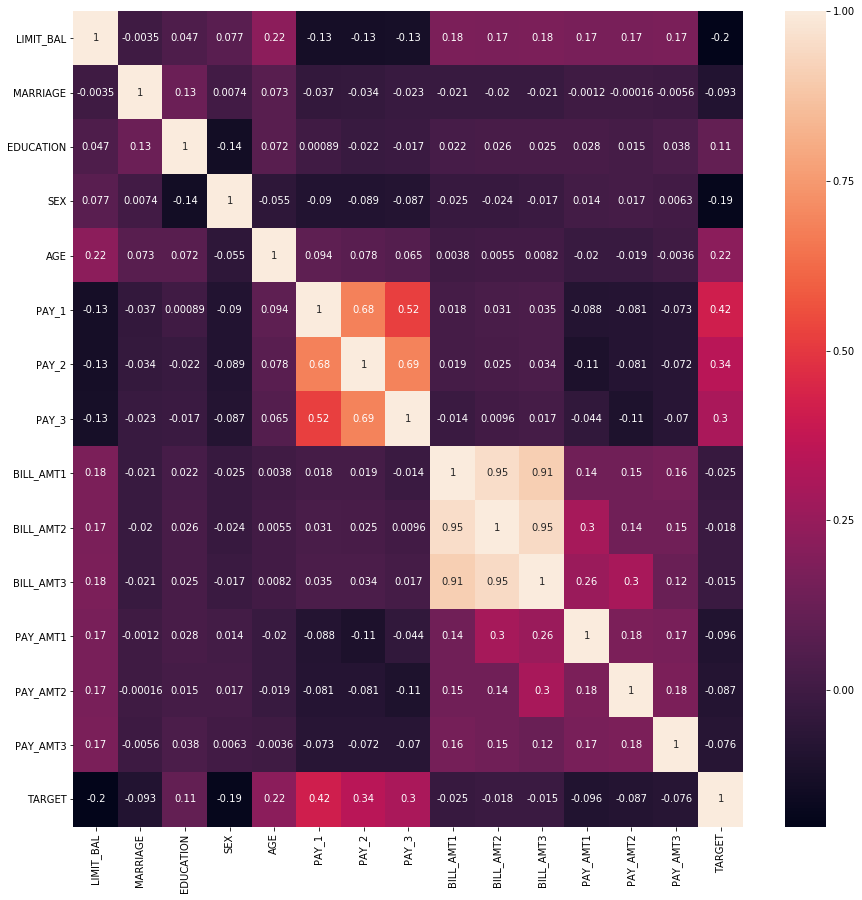

In [23]:
# correlation antar variable kecuali ID

plt.figure(figsize=(15,15))
sns.heatmap(training.iloc[:,1:16].corr(),annot=True)

Terihat bahwa korekasi yang besar adalah 
Bill AMT(i) vs Bill AMT(j)
Korelasi yang cukup besar adalah 
PAY(i) vs PAY(j), 

Korelasi dengan TARGET yang cukup besar adalah 
PAY(1), PAY(2), PAY(3), Age, dan Education

Oleh karena itu, untuk modelling, kita hanya memerhatikan beberapa features tersebut.

## Distribution of Data 

### For Identify the Outlier

## Distribution of Data for Age and Limit Balance

Text(0.5,0,'Limit Balance')

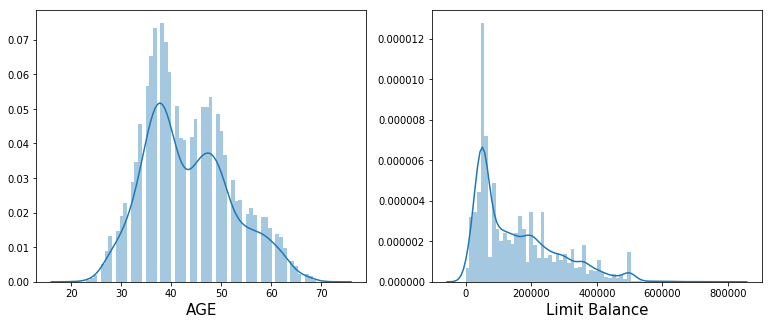

In [3]:
f=plt.figure(figsize=(13,5))

# Distribution of Age
f.add_subplot(1,2,1)
a=sns.distplot(training.AGE, bins=70)
a.set_xlabel("AGE", fontsize=15)


f.add_subplot(1,2,2)
# Distribution of Limit Balance
a=sns.distplot(training.LIMIT_BAL, bins=70)
a.set_xlabel("Limit Balance", fontsize=15)



## Distribution of PAY(i)

Text(0.5,0,'PAY_3')

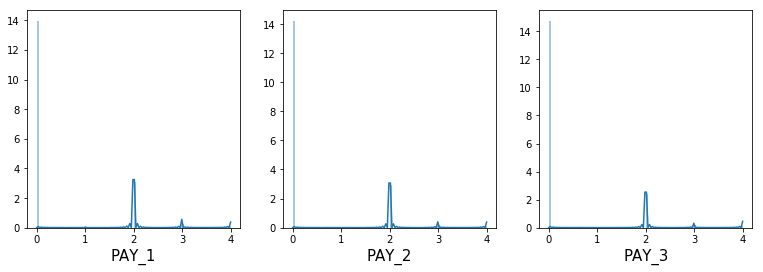

In [7]:
f=plt.figure(figsize=(13,4))

# Distribution of PAY_1
f.add_subplot(1,3,1)
a=sns.distplot(testing.PAY_1, bins=70)
a.set_xlabel("PAY_1", fontsize=15)

# Distribution of PAY_2
f.add_subplot(1,3,2)
a=sns.distplot(testing.PAY_2, bins=70)
a.set_xlabel("PAY_2", fontsize=15)

# Distribution of PAY_3
f.add_subplot(1,3,3)
a=sns.distplot(testing.PAY_3, bins=70)
a.set_xlabel("PAY_3", fontsize=15)

In [24]:
# looking for percentages target 
target=pd.DataFrame(training['TARGET'].value_counts())
target

,TARGET
0,9989
1,6636


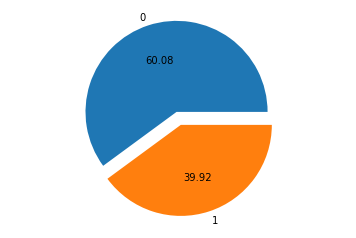

In [28]:
explode = (0.1,0.05)

plt.pie(target['TARGET'],labels=target.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()



0: Terlambat
1: Tidak Terlambat

In [16]:
# looking for percentages Education
education=pd.DataFrame(training['EDUCATION'].value_counts())
education

,EDUCATION
2,6925
3,5359
1,4029
4,312


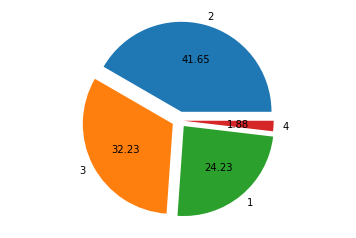

In [20]:
explode = (0.1,0.08,0.08, 0.05)

plt.pie(education['EDUCATION'],labels=education.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

1: S2/S3, 2: Dipl/S1, 3: SMA, 4: Lainnya

## Bar Plot for Testing Data

In [15]:
# looking for amount of late-payment in Test Data

sumpay1test=pd.DataFrame(testing['PAY_1'].value_counts())
sumpay2test=pd.DataFrame(testing['PAY_2'].value_counts())
sumpay3test=pd.DataFrame(testing['PAY_3'].value_counts())
sumpay1test

,PAY_1
0,13287
2,2944
3,260
4,117
1,17


In [9]:
sumpay2test

,PAY_2
0,13534
2,2784
3,185
4,120
1,2


In [10]:
sumpay3test

,PAY_3
0,14037
2,2300
3,145
4,141
1,2


Text(0.5,0,'PAY_3')

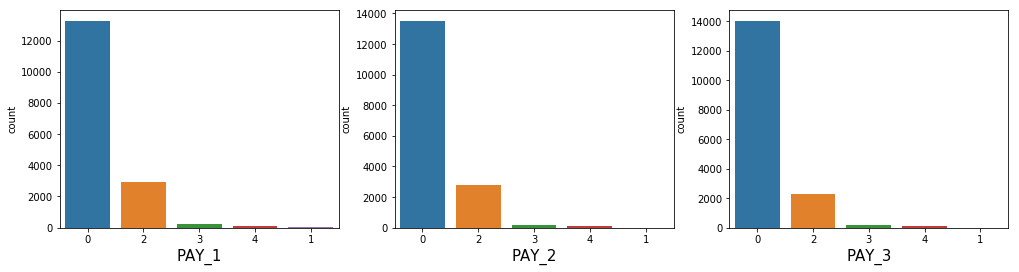

In [68]:
f=plt.figure(figsize=(17,4))

# Bar Plot for PAY_1
f.add_subplot(1,3,1)
a=sns.countplot(testing['PAY_1'],order=testing['PAY_1'].value_counts().index)
a.set_xlabel("PAY_1", fontsize=15)



# Bar Plot for PAY_2
f.add_subplot(1,3,2)
a=sns.countplot(testing['PAY_2'],order=testing['PAY_2'].value_counts().index)
a.set_xlabel("PAY_2", fontsize=15)

# Bar Plot for PAY_3
f.add_subplot(1,3,3)
a=sns.countplot(testing['PAY_3'],order=testing['PAY_3'].value_counts().index)
a.set_xlabel("PAY_3", fontsize=15)

Dari Barplot diatas dan describe memang customer lebih banyak yang tidak mengalami telat bayar

# Modelling / Classification
* Logistic Regression with 5 Features
* Logistic Regression with 3 Features
* SVM with 6 Features
* Random Forest with 2 Features

## Logistic Regression with 5 Features

In [22]:
#data training hanya menggunakan kolom PAY(1), PAY(2), PAY(3), Age, dan Education 

X = training[['PAY_1', 'PAY_2', 'PAY_3','AGE','EDUCATION']]
y = training['TARGET']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [14]:
X.head()

,PAY_1,PAY_2,PAY_3,AGE,EDUCATION
0,0,0,0,40,1
1,1,2,0,41,1
2,0,0,0,36,1
3,0,0,0,35,1
4,0,0,0,38,1


In [23]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1758,  229],
       [ 674,  664]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

target =["terlambat", "tidak terlambat"]
print(classification_report(y_test, y_pred, target_names=target))

                 precision    recall  f1-score   support

      terlambat       0.72      0.88      0.80      1987
tidak terlambat       0.74      0.50      0.60      1338

    avg / total       0.73      0.73      0.72      3325



Dari model Linear regresi 5 features, didapatkan :
presisi sebesar 72% untuk yang membayar terlambat, dan 
presisi sebesar 74% untuk yang membayat tidak terlambat

In [26]:
#data testing hanya menggunakan kolom PAY(1), PAY(2), PAY(3), Age, dan Education 

Xtesting = testing[['PAY_1', 'PAY_2', 'PAY_3','AGE','EDUCATION']]

In [27]:
# Predicting the Testing set results
y_pred_testing_lr5 = classifier.predict(Xtesting)
y_pred_testing_lr5=pd.DataFrame(y_pred_testing_lr5)

# rename column to TARGET_Pred
y_pred_testing_lr5.rename(columns={0:'TARGET_Pred'}, inplace=True)
y_pred_testing_lr5.head()

,TARGET_Pred
0,0
1,1
2,0
3,0
4,0


Text(0,0.5,'Customers')

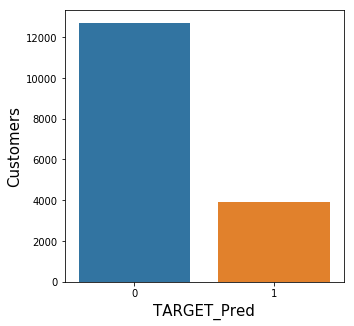

In [28]:
plt.figure(figsize=(5,5))

a=sns.countplot(y_pred_testing_lr5['TARGET_Pred'],order=y_pred_testing_lr5['TARGET_Pred'].value_counts().index)
a.set_xlabel("TARGET_Pred", fontsize=15)
a.set_ylabel("Customers", fontsize=15)

## Logistic Regression with 3 Features


In [29]:
#data training hanya menggunakan kolom PAY(1), PAY(2), PAY(3) 

X = training[['PAY_1', 'PAY_2', 'PAY_3']]
y = training['TARGET']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1800,  187],
       [ 753,  585]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

target =["terlambat", "tidak terlambat"]
print(classification_report(y_test, y_pred, target_names=target))

                 precision    recall  f1-score   support

      terlambat       0.71      0.91      0.79      1987
tidak terlambat       0.76      0.44      0.55      1338

    avg / total       0.73      0.72      0.70      3325



Dari model Linear regresi 3 features, didapatkan : presisi sebesar 71% untuk yang membayar terlambat, dan presisi sebesar 76% untuk yang membayat tidak terlambat

In [31]:
#data testing hanya menggunakan kolom PAY(1), PAY(2), PAY(3)

Xtesting = testing[['PAY_1', 'PAY_2', 'PAY_3']]

In [32]:
# Predicting the Testing set results
y_pred_testing_lr3 = classifier.predict(Xtesting)
y_pred_testing_lr3=pd.DataFrame(y_pred_testing_lr3)

# rename column to TARGET_Pred
y_pred_testing_lr3.rename(columns={0:'TARGET_Pred'}, inplace=True)
y_pred_testing_lr3.head()

,TARGET_Pred
0,0
1,1
2,0
3,0
4,0


Text(0,0.5,'Customers')

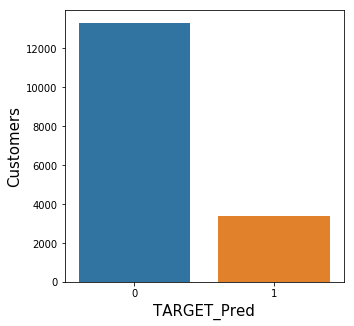

In [33]:
plt.figure(figsize=(5,5))

b=sns.countplot(y_pred_testing_lr3['TARGET_Pred'],order=y_pred_testing_lr3['TARGET_Pred'].value_counts().index)
b.set_xlabel("TARGET_Pred", fontsize=15)
b.set_ylabel("Customers", fontsize=15)

## Support Vector Machine with 6 features

In [34]:
#Explore dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv', sep=';')

#data training hanya menggunakan kolom PAY(1) PAY(2) EDUCATION SEX and AGE

X = training[['PAY_1', 'PAY_2','PAY_3','EDUCATION', 'SEX', 'AGE']]
y = training['TARGET']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[1763,  224],
       [ 693,  645]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

target =["terlambat", "tidak terlambat"]
print(classification_report(y_test, y_pred, target_names=target))

                 precision    recall  f1-score   support

      terlambat       0.72      0.89      0.79      1987
tidak terlambat       0.74      0.48      0.58      1338

    avg / total       0.73      0.72      0.71      3325



Dari model SVM 6 features, didapatkan : presisi sebesar 72% untuk yang membayar terlambat, dan presisi sebesar 74% untuk yang membayat tidak terlambat

In [37]:
#data testing hanya menggunakan kolom PAY(1), PAY(2), PAY(3), EDUCATION, SEX and AGE

Xtesting = testing[['PAY_1', 'PAY_2', 'PAY_3','EDUCATION', 'SEX', 'AGE']]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtesting = sc.fit_transform(Xtesting)

# Predicting the Testing set results
y_pred_testing_svm6 = classifier.predict(Xtesting)
y_pred_testing_svm6=pd.DataFrame(y_pred_testing_svm6)

# rename column to TARGET_Pred
y_pred_testing_svm6.rename(columns={0:'TARGET_Pred'}, inplace=True)
y_pred_testing_svm6.head()

,TARGET_Pred
0,0
1,1
2,0
3,0
4,0


Text(0,0.5,'Customers')

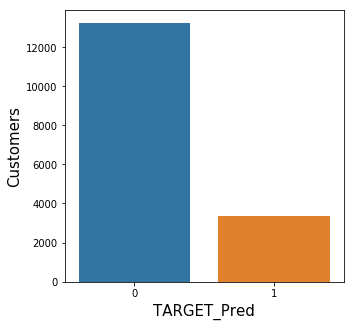

In [17]:
plt.figure(figsize=(5,5))

c=sns.countplot(y_pred_testing_svm6['TARGET_Pred'],order=y_pred_testing_svm6['TARGET_Pred'].value_counts().index)
c.set_xlabel("TARGET_Pred", fontsize=15)
c.set_ylabel("Customers", fontsize=15)

## Random Forest Classification

In [38]:
#Explore dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv', sep=';')


#data training hanya menggunakan kolom PAY(1),PAY(2), dan Limit_Balance

X = training[['PAY_1', 'PAY_2', 'LIMIT_BAL']]
y = training['TARGET']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1817,  170],
       [ 493,  845]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

target =["terlambat", "tidak terlambat"]
print(classification_report(y_test, y_pred, target_names=target))

                 precision    recall  f1-score   support

      terlambat       0.79      0.91      0.85      1987
tidak terlambat       0.83      0.63      0.72      1338

    avg / total       0.81      0.80      0.79      3325



Dari model Random Forest 3 features, didapatkan : presisi sebesar 79% untuk yang membayar terlambat, dan presisi sebesar 83% untuk yang membayat tidak terlamba

In [40]:
#data testing hanya menggunakan kolom PAY(1), PAY(2), and Limit Balance

Xtesting = testing[['PAY_1', 'PAY_2', 'LIMIT_BAL']]

# Predicting the Testing set results
y_pred_testing_rf2 = classifier.predict(Xtesting)
y_pred_testing_rf2=pd.DataFrame(y_pred_testing_rf2)

# rename column to TARGET_Pred
y_pred_testing_rf2.rename(columns={0:'TARGET_Pred'}, inplace=True)
y_pred_testing_rf2.head()

,TARGET_Pred
0,0
1,0
2,0
3,0
4,0


Text(0,0.5,'Customers')

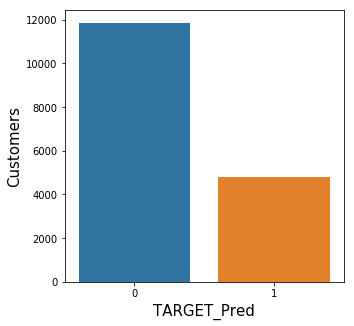

In [41]:
plt.figure(figsize=(5,5))

d=sns.countplot(y_pred_testing_rf2['TARGET_Pred'],order=y_pred_testing_rf2['TARGET_Pred'].value_counts().index)
d.set_xlabel("TARGET_Pred", fontsize=15)
d.set_ylabel("Customers", fontsize=15)

## Summary

From the explorations above, we conclude that around 12.000-12.500 customers will pay the credit on the time, and 2500 others will pay lately. The number of customers as you can see in the Barplots from Logistic Regression, SVM, and Random Forest Classification below.

Text(0,0.5,'Customers')

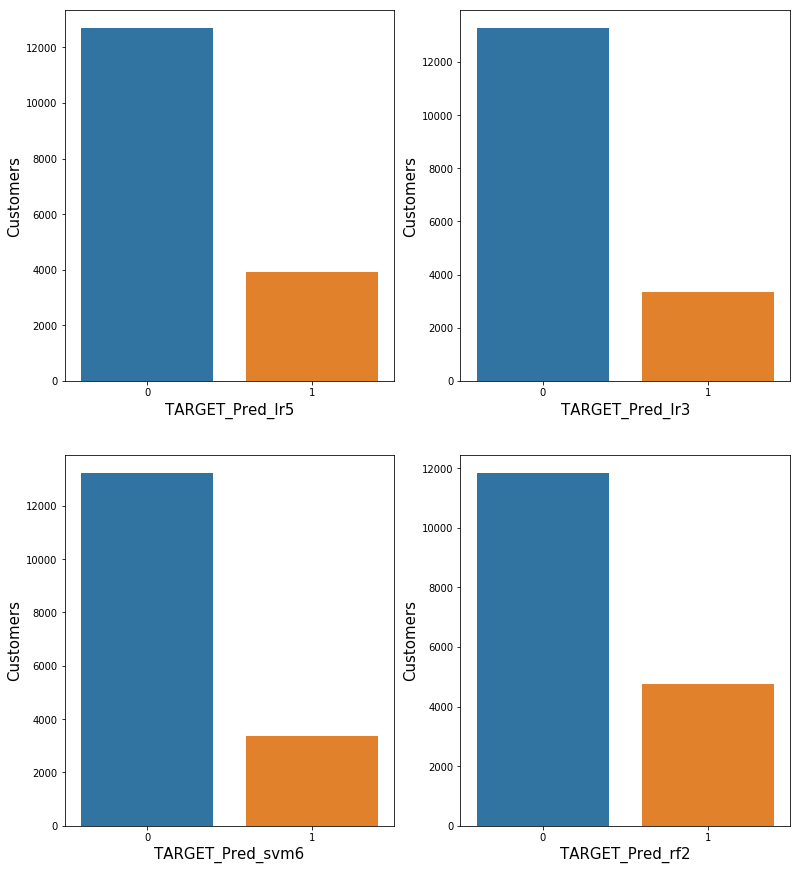

In [42]:
f=plt.figure(figsize=(13,15))

f.add_subplot(2,2,1)
a=sns.countplot(y_pred_testing_lr5['TARGET_Pred'],order=y_pred_testing_lr5['TARGET_Pred'].value_counts().index)
a.set_xlabel("TARGET_Pred_lr5", fontsize=15)
a.set_ylabel("Customers", fontsize=15)

f.add_subplot(2,2,2)
b=sns.countplot(y_pred_testing_lr3['TARGET_Pred'],order=y_pred_testing_lr3['TARGET_Pred'].value_counts().index)
b.set_xlabel("TARGET_Pred_lr3", fontsize=15)
b.set_ylabel("Customers", fontsize=15)

f.add_subplot(2,2,3)
c=sns.countplot(y_pred_testing_svm6['TARGET_Pred'],order=y_pred_testing_svm6['TARGET_Pred'].value_counts().index)
c.set_xlabel("TARGET_Pred_svm6", fontsize=15)
c.set_ylabel("Customers", fontsize=15)

f.add_subplot(2,2,4)
d=sns.countplot(y_pred_testing_rf2['TARGET_Pred'],order=y_pred_testing_rf2['TARGET_Pred'].value_counts().index)
d.set_xlabel("TARGET_Pred_rf2", fontsize=15)
d.set_ylabel("Customers", fontsize=15)

